## Data Wrangling Rent Prices by Zipcode
from Zillow public data

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#change directory to get data
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/raw'
os.chdir(path)

In [3]:
#load rental data
df_rents = pd.read_csv('Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
r18 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2018.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2018 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2018.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2017 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2017.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2016 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2016.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2015 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2016.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2014 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2014.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2013 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2013.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2012 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2012.B25063_data_with_overlays_2020-10-22T230341.csv')
df_ACSrents2011 = pd.read_csv('ACS_RentPrice_byZipcodes_productDownload_2020-10-22T230534/ACSDT5Y2011.B25063_data_with_overlays_2020-10-22T230341.csv')                              

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_rents

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,61639,10025,1,"New York, NY",2971.0,2984.0,2997.0,3010.0,3023.0,3036.0,...,3250.0,3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0
1,84654,60657,2,"Chicago, IL",1561.0,1567.0,1572.0,1577.0,1582.0,1587.0,...,1804.0,1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0
2,61637,10023,3,"New York, NY",3145.0,3154.0,3162.0,3170.0,3177.0,3184.0,...,3359.0,3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0
3,91982,77494,4,"Houston, TX",1790.0,1793.0,1797.0,1800.0,1803.0,1806.0,...,1803.0,1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0
4,84616,60614,5,"Chicago, IL",1760.0,1765.0,1770.0,1775.0,1780.0,1785.0,...,2046.0,2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,2110,9469,"Boston, MA",4266.0,4260.0,4254.0,4248.0,NaN,4239.0,...,4654.0,4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0
3239,66128,20004,9592,"Washington, DC",NaN,NaN,2271.0,2278.0,NaN,2290.0,...,2488.0,2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0
3240,399647,80951,9634,"Colorado Springs, CO",NaN,1233.0,1237.0,1242.0,1246.0,1250.0,...,1621.0,1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0
3241,62311,11964,10014,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,...,16028.0,NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN


In [5]:
df_ACSrents2018

,GEO_ID,NAME,B25063_001E,B25063_001M,B25063_002E,B25063_002M,B25063_003E,B25063_003M,B25063_004E,B25063_004M,...,B25063_023E,B25063_023M,B25063_024E,B25063_024M,B25063_025E,B25063_025M,B25063_026E,B25063_026M,B25063_027E,B25063_027M
0,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!With cash rent,Margin of Error!!Total!!With cash rent,Estimate!!Total!!With cash rent!!Less than $100,Margin of Error!!Total!!With cash rent!!Less t...,Estimate!!Total!!With cash rent!!$100 to $149,Margin of Error!!Total!!With cash rent!!$100 t...,...,"Estimate!!Total!!With cash rent!!$2,000 to $2,499","Margin of Error!!Total!!With cash rent!!$2,000...","Estimate!!Total!!With cash rent!!$2,500 to $2,999","Margin of Error!!Total!!With cash rent!!$2,500...","Estimate!!Total!!With cash rent!!$3,000 to $3,499","Margin of Error!!Total!!With cash rent!!$3,000...","Estimate!!Total!!With cash rent!!$3,500 or more","Margin of Error!!Total!!With cash rent!!$3,500...",Estimate!!Total!!No cash rent,Margin of Error!!Total!!No cash rent
1,8600000US43964,ZCTA5 43964,1126,163,1032,164,25,31,0,16,...,0,16,0,16,0,16,0,16,94,65
2,8600000US28216,ZCTA5 28216,9277,593,8997,585,0,29,33,40,...,72,62,2,5,0,29,0,29,280,186
3,8600000US28277,ZCTA5 28277,7941,482,7807,485,0,29,0,29,...,584,194,74,46,70,65,46,56,134,65
4,8600000US28278,ZCTA5 28278,2498,270,2416,267,0,23,0,23,...,135,76,113,89,37,43,0,23,82,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,8600000US98279,ZCTA5 98279,81,31,64,25,9,9,0,12,...,0,12,0,12,0,12,0,12,17,16
33117,8600000US98280,ZCTA5 98280,23,18,16,15,0,12,0,12,...,0,12,0,12,0,12,0,12,7,10
33118,8600000US98311,ZCTA5 98311,2910,350,2757,360,0,22,12,27,...,171,130,0,22,0,22,0,22,153,96
33119,8600000US98326,ZCTA5 98326,106,48,106,48,0,12,0,12,...,0,12,0,12,0,12,0,12,0,12


## ACS Rental Data Cleaning
Data from American Community Survey

In [6]:
#change header row
header_row = 0
df_ACSrents2018.columns = df_ACSrents2018.iloc[0]
df_ACSrents2018 = df_ACSrents2018.drop(0)

In [7]:
#drop margin of errors columns
df_ACSrents2018 = df_ACSrents2018.drop(columns=['Margin of Error!!Total',
       'Margin of Error!!Total!!With cash rent',
       'Margin of Error!!Total!!With cash rent!!Less than $100',
       'Margin of Error!!Total!!With cash rent!!$100 to $149',
       'Margin of Error!!Total!!With cash rent!!$150 to $199',
       'Margin of Error!!Total!!With cash rent!!$200 to $249',
       'Margin of Error!!Total!!With cash rent!!$250 to $299',
       'Margin of Error!!Total!!With cash rent!!$300 to $349',
       'Margin of Error!!Total!!With cash rent!!$350 to $399',
       'Margin of Error!!Total!!With cash rent!!$400 to $449',
       'Margin of Error!!Total!!With cash rent!!$450 to $499',
       'Margin of Error!!Total!!With cash rent!!$500 to $549',
       'Margin of Error!!Total!!With cash rent!!$550 to $599',
       'Margin of Error!!Total!!With cash rent!!$600 to $649',
       'Margin of Error!!Total!!With cash rent!!$650 to $699',
       'Margin of Error!!Total!!With cash rent!!$700 to $749',
       'Margin of Error!!Total!!With cash rent!!$750 to $799',
       'Margin of Error!!Total!!With cash rent!!$800 to $899',
       'Margin of Error!!Total!!With cash rent!!$900 to $999',
       'Margin of Error!!Total!!With cash rent!!$1,000 to $1,249',
       'Margin of Error!!Total!!With cash rent!!$1,250 to $1,499',
       'Margin of Error!!Total!!With cash rent!!$1,500 to $1,999',
       'Margin of Error!!Total!!With cash rent!!$2,000 to $2,499',
       'Margin of Error!!Total!!With cash rent!!$2,500 to $2,999',
       'Margin of Error!!Total!!With cash rent!!$3,000 to $3,499',
       'Margin of Error!!Total!!With cash rent!!$3,500 or more',
       'Margin of Error!!Total!!No cash rent'])

In [8]:
df_ACSrents2018.columns

Index(['id', 'Geographic Area Name', 'Estimate!!Total',
       'Estimate!!Total!!With cash rent',
       'Estimate!!Total!!With cash rent!!Less than $100',
       'Estimate!!Total!!With cash rent!!$100 to $149',
       'Estimate!!Total!!With cash rent!!$150 to $199',
       'Estimate!!Total!!With cash rent!!$200 to $249',
       'Estimate!!Total!!With cash rent!!$250 to $299',
       'Estimate!!Total!!With cash rent!!$300 to $349',
       'Estimate!!Total!!With cash rent!!$350 to $399',
       'Estimate!!Total!!With cash rent!!$400 to $449',
       'Estimate!!Total!!With cash rent!!$450 to $499',
       'Estimate!!Total!!With cash rent!!$500 to $549',
       'Estimate!!Total!!With cash rent!!$550 to $599',
       'Estimate!!Total!!With cash rent!!$600 to $649',
       'Estimate!!Total!!With cash rent!!$650 to $699',
       'Estimate!!Total!!With cash rent!!$700 to $749',
       'Estimate!!Total!!With cash rent!!$750 to $799',
       'Estimate!!Total!!With cash rent!!$800 to $899',
    

In [9]:
#change numeric columns in ACS dataframe to float
numeric_cols = ['Estimate!!Total',
       'Estimate!!Total!!With cash rent',
       'Estimate!!Total!!With cash rent!!Less than $100',
       'Estimate!!Total!!With cash rent!!$100 to $149',
       'Estimate!!Total!!With cash rent!!$150 to $199',
       'Estimate!!Total!!With cash rent!!$200 to $249',
       'Estimate!!Total!!With cash rent!!$250 to $299',
       'Estimate!!Total!!With cash rent!!$300 to $349',
       'Estimate!!Total!!With cash rent!!$350 to $399',
       'Estimate!!Total!!With cash rent!!$400 to $449',
       'Estimate!!Total!!With cash rent!!$450 to $499',
       'Estimate!!Total!!With cash rent!!$500 to $549',
       'Estimate!!Total!!With cash rent!!$550 to $599',
       'Estimate!!Total!!With cash rent!!$600 to $649',
       'Estimate!!Total!!With cash rent!!$650 to $699',
       'Estimate!!Total!!With cash rent!!$700 to $749',
       'Estimate!!Total!!With cash rent!!$750 to $799',
       'Estimate!!Total!!With cash rent!!$800 to $899',
       'Estimate!!Total!!With cash rent!!$900 to $999',
       'Estimate!!Total!!With cash rent!!$1,000 to $1,249',
       'Estimate!!Total!!With cash rent!!$1,250 to $1,499',
       'Estimate!!Total!!With cash rent!!$1,500 to $1,999',
       'Estimate!!Total!!With cash rent!!$2,000 to $2,499',
       'Estimate!!Total!!With cash rent!!$2,500 to $2,999',
       'Estimate!!Total!!With cash rent!!$3,000 to $3,499',
       'Estimate!!Total!!With cash rent!!$3,500 or more',
       'Estimate!!Total!!No cash rent']
df_ACSrents2018[numeric_cols] = df_ACSrents2018[numeric_cols].astype('float')
df_ACSrents2018.dtypes

0
id                                                    object
Geographic Area Name                                  object
Estimate!!Total                                      float64
Estimate!!Total!!With cash rent                      float64
Estimate!!Total!!With cash rent!!Less than $100      float64
Estimate!!Total!!With cash rent!!$100 to $149        float64
Estimate!!Total!!With cash rent!!$150 to $199        float64
Estimate!!Total!!With cash rent!!$200 to $249        float64
Estimate!!Total!!With cash rent!!$250 to $299        float64
Estimate!!Total!!With cash rent!!$300 to $349        float64
Estimate!!Total!!With cash rent!!$350 to $399        float64
Estimate!!Total!!With cash rent!!$400 to $449        float64
Estimate!!Total!!With cash rent!!$450 to $499        float64
Estimate!!Total!!With cash rent!!$500 to $549        float64
Estimate!!Total!!With cash rent!!$550 to $599        float64
Estimate!!Total!!With cash rent!!$600 to $649        float64
Estimate!!Total!!With 

#### Create column with average rent price per zipcode


In [10]:
df_ACSrents2018.columns

Index(['id', 'Geographic Area Name', 'Estimate!!Total',
       'Estimate!!Total!!With cash rent',
       'Estimate!!Total!!With cash rent!!Less than $100',
       'Estimate!!Total!!With cash rent!!$100 to $149',
       'Estimate!!Total!!With cash rent!!$150 to $199',
       'Estimate!!Total!!With cash rent!!$200 to $249',
       'Estimate!!Total!!With cash rent!!$250 to $299',
       'Estimate!!Total!!With cash rent!!$300 to $349',
       'Estimate!!Total!!With cash rent!!$350 to $399',
       'Estimate!!Total!!With cash rent!!$400 to $449',
       'Estimate!!Total!!With cash rent!!$450 to $499',
       'Estimate!!Total!!With cash rent!!$500 to $549',
       'Estimate!!Total!!With cash rent!!$550 to $599',
       'Estimate!!Total!!With cash rent!!$600 to $649',
       'Estimate!!Total!!With cash rent!!$650 to $699',
       'Estimate!!Total!!With cash rent!!$700 to $749',
       'Estimate!!Total!!With cash rent!!$750 to $799',
       'Estimate!!Total!!With cash rent!!$800 to $899',
    

In [11]:
#store columns of interest for easier calculations
total=df_ACSrents2018['Estimate!!Total!!With cash rent']
a=df_ACSrents2018['Estimate!!Total!!With cash rent!!Less than $100']
b=df_ACSrents2018['Estimate!!Total!!With cash rent!!$100 to $149']
c=df_ACSrents2018['Estimate!!Total!!With cash rent!!$150 to $199']
d=df_ACSrents2018['Estimate!!Total!!With cash rent!!$200 to $249']
e=df_ACSrents2018['Estimate!!Total!!With cash rent!!$250 to $299']
f=df_ACSrents2018['Estimate!!Total!!With cash rent!!$300 to $349']
g=df_ACSrents2018['Estimate!!Total!!With cash rent!!$350 to $399']
h=df_ACSrents2018['Estimate!!Total!!With cash rent!!$400 to $449']
i=df_ACSrents2018['Estimate!!Total!!With cash rent!!$450 to $499']
j=df_ACSrents2018['Estimate!!Total!!With cash rent!!$500 to $549']
k=df_ACSrents2018['Estimate!!Total!!With cash rent!!$550 to $599']
l=df_ACSrents2018['Estimate!!Total!!With cash rent!!$600 to $649']
m=df_ACSrents2018['Estimate!!Total!!With cash rent!!$650 to $699']
n=df_ACSrents2018['Estimate!!Total!!With cash rent!!$700 to $749']
o=df_ACSrents2018['Estimate!!Total!!With cash rent!!$750 to $799']
p=df_ACSrents2018['Estimate!!Total!!With cash rent!!$800 to $899']
q=df_ACSrents2018['Estimate!!Total!!With cash rent!!$900 to $999']
r=df_ACSrents2018['Estimate!!Total!!With cash rent!!$1,000 to $1,249']
s=df_ACSrents2018['Estimate!!Total!!With cash rent!!$1,250 to $1,499']
t=df_ACSrents2018['Estimate!!Total!!With cash rent!!$1,500 to $1,999']
u=df_ACSrents2018['Estimate!!Total!!With cash rent!!$2,000 to $2,499']
v=df_ACSrents2018['Estimate!!Total!!With cash rent!!$2,500 to $2,999']
w=df_ACSrents2018['Estimate!!Total!!With cash rent!!$3,000 to $3,499']
x=df_ACSrents2018['Estimate!!Total!!With cash rent!!$3,500 or more']

In [12]:
#check len of total(cash rents) is valid
len(total)==len(df_ACSrents2018['Estimate!!Total'] - df_ACSrents2018['Estimate!!Total!!No cash rent'])

True

In [13]:
#calculate average row by:
#summing median rent of column's given cash rent range, ie. b = $125 ($100 to $149)
#multiply this by n number of people (value of the column), ie. $125*b
#divided by total n of people, ie. 'total'
#note* for rents above $3500, used $5401.47 as this was 2 std higher than mean from zillow rental data
df_ACSrents2018['Avg_RentPrice'] = round((a*50 + b*125 + c*175 + d*225 + e*275 + f*325 + g*375 + h*425 + i*475 + j*525 + k*575 + l*625+ m*675+ n*725+ o*775+ p*850+ q*950+ r*1125+ s*1375 + t*1750 + u*2250 + v*2750+ w*3250 + x*5401.47)/total, 2)

In [14]:
#subset df for columns of interest and clean zipcode data
df_ACSrents2018 = df_ACSrents2018[['Geographic Area Name', 'Avg_RentPrice']]
df_ACSrents2018['Geographic Area Name']= df_ACSrents2018['Geographic Area Name'].str.replace('ZCTA5 ','')

In [15]:
#change zipcode name to match zillow data
df_ACSrents2018 = df_ACSrents2018.rename(columns = {'Geographic Area Name':'RegionName'})

In [16]:
#reset index
df_ACSrents2018 = df_ACSrents2018.reset_index(drop=True)

In [17]:
df_ACSrents2018.isna().sum()

0
RegionName          0
Avg_RentPrice    2504
dtype: int64

In [18]:
#trying to figure out why these zipcodes are NaN, running into trouble
#mask = df_ACSrents2018[df_ACSrents2018.isnull().any(axis=1)].RegionName
#r18[r18.RegionName == mask]

In [19]:
#create function, clean_ACS() to automate data cleaning on 2018-2015 ACS dataframes
def clean_ACS(dataframe):
    """automates data cleaning for rental data from 2015-2018 ACS dataframes"""
    header_row = 0 #change header row
    dataframe.columns = dataframe.iloc[0]
    dataframe.drop(0, inplace=True)
    dataframe.drop(columns=['Margin of Error!!Total',
       'Margin of Error!!Total!!With cash rent',
       'Margin of Error!!Total!!With cash rent!!Less than $100',
       'Margin of Error!!Total!!With cash rent!!$100 to $149',
       'Margin of Error!!Total!!With cash rent!!$150 to $199',
       'Margin of Error!!Total!!With cash rent!!$200 to $249',
       'Margin of Error!!Total!!With cash rent!!$250 to $299',
       'Margin of Error!!Total!!With cash rent!!$300 to $349',
       'Margin of Error!!Total!!With cash rent!!$350 to $399',
       'Margin of Error!!Total!!With cash rent!!$400 to $449',
       'Margin of Error!!Total!!With cash rent!!$450 to $499',
       'Margin of Error!!Total!!With cash rent!!$500 to $549',
       'Margin of Error!!Total!!With cash rent!!$550 to $599',
       'Margin of Error!!Total!!With cash rent!!$600 to $649',
       'Margin of Error!!Total!!With cash rent!!$650 to $699',
       'Margin of Error!!Total!!With cash rent!!$700 to $749',
       'Margin of Error!!Total!!With cash rent!!$750 to $799',
       'Margin of Error!!Total!!With cash rent!!$800 to $899',
       'Margin of Error!!Total!!With cash rent!!$900 to $999',
       'Margin of Error!!Total!!With cash rent!!$1,000 to $1,249',
       'Margin of Error!!Total!!With cash rent!!$1,250 to $1,499',
       'Margin of Error!!Total!!With cash rent!!$1,500 to $1,999',
       'Margin of Error!!Total!!With cash rent!!$2,000 to $2,499',
       'Margin of Error!!Total!!With cash rent!!$2,500 to $2,999',
       'Margin of Error!!Total!!With cash rent!!$3,000 to $3,499',
       'Margin of Error!!Total!!With cash rent!!$3,500 or more',
       'Margin of Error!!Total!!No cash rent'], inplace=True) #drop margin of errors columns
    #change numeric columns in ACS dataframe to float
    numeric_cols = ['Estimate!!Total',
           'Estimate!!Total!!With cash rent',
           'Estimate!!Total!!With cash rent!!Less than $100',
           'Estimate!!Total!!With cash rent!!$100 to $149',
           'Estimate!!Total!!With cash rent!!$150 to $199',
           'Estimate!!Total!!With cash rent!!$200 to $249',
           'Estimate!!Total!!With cash rent!!$250 to $299',
           'Estimate!!Total!!With cash rent!!$300 to $349',
           'Estimate!!Total!!With cash rent!!$350 to $399',
           'Estimate!!Total!!With cash rent!!$400 to $449',
           'Estimate!!Total!!With cash rent!!$450 to $499',
           'Estimate!!Total!!With cash rent!!$500 to $549',
           'Estimate!!Total!!With cash rent!!$550 to $599',
           'Estimate!!Total!!With cash rent!!$600 to $649',
           'Estimate!!Total!!With cash rent!!$650 to $699',
           'Estimate!!Total!!With cash rent!!$700 to $749',
           'Estimate!!Total!!With cash rent!!$750 to $799',
           'Estimate!!Total!!With cash rent!!$800 to $899',
           'Estimate!!Total!!With cash rent!!$900 to $999',
           'Estimate!!Total!!With cash rent!!$1,000 to $1,249',
           'Estimate!!Total!!With cash rent!!$1,250 to $1,499',
           'Estimate!!Total!!With cash rent!!$1,500 to $1,999',
           'Estimate!!Total!!With cash rent!!$2,000 to $2,499',
           'Estimate!!Total!!With cash rent!!$2,500 to $2,999',
           'Estimate!!Total!!With cash rent!!$3,000 to $3,499',
           'Estimate!!Total!!With cash rent!!$3,500 or more',
           'Estimate!!Total!!No cash rent']
    dataframe[numeric_cols] = dataframe[numeric_cols].astype('float')
    #store columns of interest for easier calculations
    total=dataframe['Estimate!!Total!!With cash rent']
    a=dataframe['Estimate!!Total!!With cash rent!!Less than $100']
    b=dataframe['Estimate!!Total!!With cash rent!!$100 to $149']
    c=dataframe['Estimate!!Total!!With cash rent!!$150 to $199']
    d=dataframe['Estimate!!Total!!With cash rent!!$200 to $249']
    e=dataframe['Estimate!!Total!!With cash rent!!$250 to $299']
    f=dataframe['Estimate!!Total!!With cash rent!!$300 to $349']
    g=dataframe['Estimate!!Total!!With cash rent!!$350 to $399']
    h=dataframe['Estimate!!Total!!With cash rent!!$400 to $449']
    i=dataframe['Estimate!!Total!!With cash rent!!$450 to $499']
    j=dataframe['Estimate!!Total!!With cash rent!!$500 to $549']
    k=dataframe['Estimate!!Total!!With cash rent!!$550 to $599']
    l=dataframe['Estimate!!Total!!With cash rent!!$600 to $649']
    m=dataframe['Estimate!!Total!!With cash rent!!$650 to $699']
    n=dataframe['Estimate!!Total!!With cash rent!!$700 to $749']
    o=dataframe['Estimate!!Total!!With cash rent!!$750 to $799']
    p=dataframe['Estimate!!Total!!With cash rent!!$800 to $899']
    q=dataframe['Estimate!!Total!!With cash rent!!$900 to $999']
    r=dataframe['Estimate!!Total!!With cash rent!!$1,000 to $1,249']
    s=dataframe['Estimate!!Total!!With cash rent!!$1,250 to $1,499']
    t=dataframe['Estimate!!Total!!With cash rent!!$1,500 to $1,999']
    u=dataframe['Estimate!!Total!!With cash rent!!$2,000 to $2,499']
    v=dataframe['Estimate!!Total!!With cash rent!!$2,500 to $2,999']
    w=dataframe['Estimate!!Total!!With cash rent!!$3,000 to $3,499']
    x=dataframe['Estimate!!Total!!With cash rent!!$3,500 or more']
    #calculate average row by:
    #summing median rent of column's given cash rent range, ie. b = $125 ($100 to $149)
    #multiply this by n number of people (value of the column), ie. $125*b
    #divided by total n of people, ie. 'total'
    #note* for rents above $3500, used $5401.47 as this was 2 std higher than mean from zillow rental data
    dataframe['Avg_RentPrice'] = round((a*50 + b*125 + c*175 + d*225 + e*275 + f*325 + g*375 + h*425 + i*475 + j*525 + k*575 + l*625+ m*675+ n*725+ o*775+ p*850+ q*950+ r*1125+ s*1375 + t*1750 + u*2250 + v*2750+ w*3250 + x*5401.47)/total, 2)
    #subset df for columns of interest and clean zipcode data
    dataframe2 = dataframe[['Geographic Area Name', 'Avg_RentPrice']]
    dataframe2['Geographic Area Name'] = dataframe2['Geographic Area Name'].str.replace('ZCTA5 ','')
    #change zipcode name to match zillow data
    dataframe2 = dataframe2.rename(columns = {'Geographic Area Name':'RegionName'})
    #reset index
    dataframe2 = dataframe2.reset_index(drop=True)
    return dataframe2;

In [20]:
df_ACSrents2017 = clean_ACS(df_ACSrents2017)
df_ACSrents2016 = clean_ACS(df_ACSrents2016)
df_ACSrents2015 = clean_ACS(df_ACSrents2015)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
df_ACSrents2014.columns

Index(['GEO_ID', 'NAME', 'B25063_001E', 'B25063_001M', 'B25063_002E',
       'B25063_002M', 'B25063_003E', 'B25063_003M', 'B25063_004E',
       'B25063_004M', 'B25063_005E', 'B25063_005M', 'B25063_006E',
       'B25063_006M', 'B25063_007E', 'B25063_007M', 'B25063_008E',
       'B25063_008M', 'B25063_009E', 'B25063_009M', 'B25063_010E',
       'B25063_010M', 'B25063_011E', 'B25063_011M', 'B25063_012E',
       'B25063_012M', 'B25063_013E', 'B25063_013M', 'B25063_014E',
       'B25063_014M', 'B25063_015E', 'B25063_015M', 'B25063_016E',
       'B25063_016M', 'B25063_017E', 'B25063_017M', 'B25063_018E',
       'B25063_018M', 'B25063_019E', 'B25063_019M', 'B25063_020E',
       'B25063_020M', 'B25063_021E', 'B25063_021M', 'B25063_022E',
       'B25063_022M', 'B25063_023E', 'B25063_023M', 'B25063_024E',
       'B25063_024M'],
      dtype='object')

In [22]:
#create function, clean_ACS() to automate data cleaning on 2014-2011 ACS dataframes
def clean_ACS2(dataframe):
    """automates data cleaning for rental data from 2014-2011 ACS dataframes"""
    header_row = 0 #change header row
    dataframe.columns = dataframe.iloc[0]
    dataframe.drop(0, inplace=True)
    dataframe.drop(columns=['Margin of Error!!Total',
       'Margin of Error!!Total!!With cash rent',
       'Margin of Error!!Total!!With cash rent!!Less than $100',
       'Margin of Error!!Total!!With cash rent!!$100 to $149',
       'Margin of Error!!Total!!With cash rent!!$150 to $199',
       'Margin of Error!!Total!!With cash rent!!$200 to $249',
       'Margin of Error!!Total!!With cash rent!!$250 to $299',
       'Margin of Error!!Total!!With cash rent!!$300 to $349',
       'Margin of Error!!Total!!With cash rent!!$350 to $399',
       'Margin of Error!!Total!!With cash rent!!$400 to $449',
       'Margin of Error!!Total!!With cash rent!!$450 to $499',
       'Margin of Error!!Total!!With cash rent!!$500 to $549',
       'Margin of Error!!Total!!With cash rent!!$550 to $599',
       'Margin of Error!!Total!!With cash rent!!$600 to $649',
       'Margin of Error!!Total!!With cash rent!!$650 to $699',
       'Margin of Error!!Total!!With cash rent!!$700 to $749',
       'Margin of Error!!Total!!With cash rent!!$750 to $799',
       'Margin of Error!!Total!!With cash rent!!$800 to $899',
       'Margin of Error!!Total!!With cash rent!!$900 to $999',
       'Margin of Error!!Total!!With cash rent!!$1,000 to $1,249',
       'Margin of Error!!Total!!With cash rent!!$1,250 to $1,499',
       'Margin of Error!!Total!!With cash rent!!$1,500 to $1,999',
       'Margin of Error!!Total!!With cash rent!!$2,000 or more',
       'Margin of Error!!Total!!No cash rent'], inplace=True) #drop margin of errors columns
    #change numeric columns in ACS dataframe to float
    numeric_cols = ['Estimate!!Total',
           'Estimate!!Total!!With cash rent',
           'Estimate!!Total!!With cash rent!!Less than $100',
           'Estimate!!Total!!With cash rent!!$100 to $149',
           'Estimate!!Total!!With cash rent!!$150 to $199',
           'Estimate!!Total!!With cash rent!!$200 to $249',
           'Estimate!!Total!!With cash rent!!$250 to $299',
           'Estimate!!Total!!With cash rent!!$300 to $349',
           'Estimate!!Total!!With cash rent!!$350 to $399',
           'Estimate!!Total!!With cash rent!!$400 to $449',
           'Estimate!!Total!!With cash rent!!$450 to $499',
           'Estimate!!Total!!With cash rent!!$500 to $549',
           'Estimate!!Total!!With cash rent!!$550 to $599',
           'Estimate!!Total!!With cash rent!!$600 to $649',
           'Estimate!!Total!!With cash rent!!$650 to $699',
           'Estimate!!Total!!With cash rent!!$700 to $749',
           'Estimate!!Total!!With cash rent!!$750 to $799',
           'Estimate!!Total!!With cash rent!!$800 to $899',
           'Estimate!!Total!!With cash rent!!$900 to $999',
           'Estimate!!Total!!With cash rent!!$1,000 to $1,249',
           'Estimate!!Total!!With cash rent!!$1,250 to $1,499',
           'Estimate!!Total!!With cash rent!!$1,500 to $1,999',
           'Estimate!!Total!!With cash rent!!$2,000 or more',
           'Estimate!!Total!!No cash rent']
    dataframe[numeric_cols] = dataframe[numeric_cols].astype('float')
    #store columns of interest for easier calculations
    total=dataframe['Estimate!!Total!!With cash rent']
    a=dataframe['Estimate!!Total!!With cash rent!!Less than $100']
    b=dataframe['Estimate!!Total!!With cash rent!!$100 to $149']
    c=dataframe['Estimate!!Total!!With cash rent!!$150 to $199']
    d=dataframe['Estimate!!Total!!With cash rent!!$200 to $249']
    e=dataframe['Estimate!!Total!!With cash rent!!$250 to $299']
    f=dataframe['Estimate!!Total!!With cash rent!!$300 to $349']
    g=dataframe['Estimate!!Total!!With cash rent!!$350 to $399']
    h=dataframe['Estimate!!Total!!With cash rent!!$400 to $449']
    i=dataframe['Estimate!!Total!!With cash rent!!$450 to $499']
    j=dataframe['Estimate!!Total!!With cash rent!!$500 to $549']
    k=dataframe['Estimate!!Total!!With cash rent!!$550 to $599']
    l=dataframe['Estimate!!Total!!With cash rent!!$600 to $649']
    m=dataframe['Estimate!!Total!!With cash rent!!$650 to $699']
    n=dataframe['Estimate!!Total!!With cash rent!!$700 to $749']
    o=dataframe['Estimate!!Total!!With cash rent!!$750 to $799']
    p=dataframe['Estimate!!Total!!With cash rent!!$800 to $899']
    q=dataframe['Estimate!!Total!!With cash rent!!$900 to $999']
    r=dataframe['Estimate!!Total!!With cash rent!!$1,000 to $1,249']
    s=dataframe['Estimate!!Total!!With cash rent!!$1,250 to $1,499']
    t=dataframe['Estimate!!Total!!With cash rent!!$1,500 to $1,999']
    u=dataframe['Estimate!!Total!!With cash rent!!$2,000 or more']
    #calculate average row by:
    #summing median rent of column's given cash rent range, ie. b = $125 ($100 to $149)
    #multiply this by n number of people (value of the column), ie. $125*b
    #divided by total n of people, ie. 'total'
    #note* for rents above $3500, used $5401.47 as this was 2 std higher than mean from zillow rental data
    dataframe['Avg_RentPrice'] = round((a*50 + b*125 + c*175 + d*225 + e*275 + f*325 + g*375 + h*425 + i*475 + j*525 + k*575 + l*625+ m*675+ n*725+ o*775+ p*850+ q*950+ r*1125+ s*1375 + t*1750 + u*5401.47)/total, 2)
    #subset df for columns of interest and clean zipcode data
    dataframe2 = dataframe[['Geographic Area Name', 'Avg_RentPrice']]
    dataframe2['Geographic Area Name'] = dataframe2['Geographic Area Name'].str.replace('ZCTA5 ','')
    #change zipcode name to match zillow data
    dataframe2 = dataframe2.rename(columns = {'Geographic Area Name':'RegionName'})
    #reset index
    dataframe2 = dataframe2.reset_index(drop=True)
    return dataframe2;

In [23]:
df_ACSrents2014 = clean_ACS2(df_ACSrents2014)
df_ACSrents2013 = clean_ACS2(df_ACSrents2013)
df_ACSrents2012 = clean_ACS2(df_ACSrents2012)
df_ACSrents2011 = clean_ACS2(df_ACSrents2011)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
#see NaN % in each data set
print('2011:', df_ACSrents2011.isna().sum()/len(df_ACSrents2011))
print('2012:', df_ACSrents2012.isna().sum()/len(df_ACSrents2012))
print('2013:', df_ACSrents2013.isna().sum()/len(df_ACSrents2013))
print('2014:', df_ACSrents2014.isna().sum()/len(df_ACSrents2014))
print('2015:', df_ACSrents2015.isna().sum()/len(df_ACSrents2015))
print('2016:', df_ACSrents2016.isna().sum()/len(df_ACSrents2016))
print('2017:', df_ACSrents2017.isna().sum()/len(df_ACSrents2017))
print('2018:', df_ACSrents2018.isna().sum()/len(df_ACSrents2018))

2011: 0
RegionName       0.000000
Avg_RentPrice    0.083152
dtype: float64
2012: 0
RegionName       0.000000
Avg_RentPrice    0.077748
dtype: float64
2013: 0
RegionName       0.000000
Avg_RentPrice    0.075393
dtype: float64
2014: 0
RegionName       0.000000
Avg_RentPrice    0.072524
dtype: float64
2015: 0
RegionName       0.000000
Avg_RentPrice    0.071649
dtype: float64
2016: 0
RegionName       0.000000
Avg_RentPrice    0.071649
dtype: float64
2017: 0
RegionName       0.000000
Avg_RentPrice    0.073339
dtype: float64
2018: 0
RegionName       0.000000
Avg_RentPrice    0.075604
dtype: float64


### Data Definition

In [25]:
#df_rents.info()

In [26]:
df_rents.dtypes

RegionID        int64
RegionName      int64
SizeRank        int64
MsaName        object
2014-01       float64
               ...   
2020-05       float64
2020-06       float64
2020-07       float64
2020-08       float64
2020-09       float64
Length: 85, dtype: object

In [27]:
df_rents.describe()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
count,3243.000000,3243.000000,3243.000000,2364.000000,2462.000000,2475.000000,2737.000000,2846.000000,2929.000000,2966.000000,...,3180.000000,3199.000000,3187.000000,3191.000000,3167.000000,3170.000000,3185.000000,3181.000000,3176.000000,3175.000000
mean,85616.164662,53784.649090,2668.007092,1520.853215,1447.351747,1450.108283,1484.118378,1519.340126,1490.326050,1534.293999,...,1832.883019,1849.924977,1840.751804,1847.084926,1857.404168,1831.263722,1849.946939,1877.163156,1860.797859,1843.268976
std,42414.118571,30954.548087,1908.083875,1956.537788,1334.171899,1344.144175,1422.938190,1802.501556,1269.719191,1732.660106,...,1096.894195,1351.323832,1176.563118,1115.353814,1336.533613,818.316132,993.692583,1404.795647,1190.472788,809.790750
min,58362.000000,1432.000000,1.000000,412.000000,516.000000,522.000000,556.000000,551.000000,553.000000,521.000000,...,600.000000,603.000000,686.000000,608.000000,691.000000,613.000000,615.000000,617.000000,619.000000,622.000000
25%,70451.500000,29402.000000,1103.500000,1067.500000,1059.250000,1060.500000,1084.000000,1086.000000,1091.000000,1099.250000,...,1382.000000,1386.500000,1388.000000,1394.000000,1400.000000,1404.000000,1406.000000,1411.000000,1416.000000,1421.000000
50%,79124.000000,48220.000000,2360.000000,1287.000000,1280.000000,1284.000000,1303.000000,1312.000000,1321.000000,1326.500000,...,1640.500000,1644.000000,1646.000000,1649.000000,1652.000000,1658.000000,1662.000000,1663.000000,1669.000000,1671.000000
75%,95042.500000,85274.500000,3906.500000,1651.000000,1645.000000,1635.500000,1670.000000,1676.750000,1699.000000,1715.750000,...,2085.000000,2086.500000,2087.500000,2091.500000,2086.000000,2096.750000,2103.000000,2103.000000,2100.000000,2107.500000
max,753844.000000,99208.000000,10262.000000,52816.000000,44606.000000,45483.000000,46360.000000,54209.000000,54526.000000,54842.000000,...,38017.000000,38257.000000,36852.000000,36319.000000,40006.000000,27419.000000,30096.000000,41864.000000,42489.000000,27156.000000


In [28]:
df_rents.nunique()

RegionID      3243
RegionName    3243
SizeRank      2999
MsaName        101
2014-01       1246
              ... 
2020-05       1612
2020-06       1632
2020-07       1591
2020-08       1588
2020-09       1575
Length: 85, dtype: int64

In [29]:
df_rents['2020-09'].value_counts(normalize=True)*100

1667.0    0.283465
1606.0    0.283465
2058.0    0.220472
1364.0    0.220472
1477.0    0.220472
            ...   
4470.0    0.031496
2533.0    0.031496
2135.0    0.031496
2337.0    0.031496
3921.0    0.031496
Name: 2020-09, Length: 1575, dtype: float64

### Data Cleaning 2: Zillow Rental Data

In [30]:
#add leading zeros to zipcode in rent dataframe
df_rents['RegionName'] = df_rents['RegionName'].apply(lambda x: '{0:0>5}'.format(x))

In [31]:
#isolate annual DataFrames from 2014-2020
df_rents_2014 = df_rents.iloc[:,:16]
df_rents_2015 = df_rents.iloc[:, np.r_[0:4,16:28]]
df_rents_2016 = df_rents.iloc[:, np.r_[0:4,28:40]]
df_rents_2017 = df_rents.iloc[:, np.r_[0:4,40:52]]
df_rents_2018 = df_rents.iloc[:, np.r_[0:4,52:64]]
df_rents_2019 = df_rents.iloc[:, np.r_[0:4,64:76]]
df_rents_2020 = df_rents.iloc[:, np.r_[0:4,76:85]]
df_rents_2020

,RegionID,RegionName,SizeRank,MsaName,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,61639,10025,1,"New York, NY",3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0
1,84654,60657,2,"Chicago, IL",1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0
2,61637,10023,3,"New York, NY",3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0
3,91982,77494,4,"Houston, TX",1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0
4,84616,60614,5,"Chicago, IL",2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,02110,9469,"Boston, MA",4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0
3239,66128,20004,9592,"Washington, DC",2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0
3240,399647,80951,9634,"Colorado Springs, CO",1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0
3241,62311,11964,10014,"New York, NY",NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN


In [32]:
#create new column for average home price for the year/zipcode
df_rents_2014['RentPrice'] = round(df_rents_2014.iloc[:,4: ].mean(axis=1), 2)
df_rents_2015['RentPrice'] = round(df_rents_2015.iloc[:,4: ].mean(axis=1), 2)
df_rents_2015['RentPrice'] = round(df_rents_2015.iloc[:,4: ].mean(axis=1), 2)
df_rents_2016['RentPrice'] = round(df_rents_2016.iloc[:,4: ].mean(axis=1), 2)
df_rents_2017['RentPrice'] = round(df_rents_2017.iloc[:,4: ].mean(axis=1), 2)
df_rents_2018['RentPrice'] = round(df_rents_2018.iloc[:,4: ].mean(axis=1), 2)
df_rents_2019['RentPrice'] = round(df_rents_2019.iloc[:,4: ].mean(axis=1), 2)
df_rents_2020['RentPrice'] = round(df_rents_2020.iloc[:,4: ].mean(axis=1), 2)
df_rents_2020

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,RegionID,RegionName,SizeRank,MsaName,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,RentPrice
0,61639,10025,1,"New York, NY",3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0,3146.67
1,84654,60657,2,"Chicago, IL",1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0,1791.56
2,61637,10023,3,"New York, NY",3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0,3268.00
3,91982,77494,4,"Houston, TX",1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0,1811.00
4,84616,60614,5,"Chicago, IL",2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0,2035.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,02110,9469,"Boston, MA",4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0,4408.57
3239,66128,20004,9592,"Washington, DC",2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0,2505.56
3240,399647,80951,9634,"Colorado Springs, CO",1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0,1647.88
3241,62311,11964,10014,"New York, NY",NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN,15800.50


In [33]:
df_rents_2014.iloc[:, 4:16]

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
0,2971.0,2984.0,2997.0,3010.0,3023.0,3036.0,3049.0,3061.0,3074.0,3087.0,3099.0,3111.0
1,1561.0,1567.0,1572.0,1577.0,1582.0,1587.0,1592.0,1597.0,1602.0,1607.0,1612.0,1617.0
2,3145.0,3154.0,3162.0,3170.0,3177.0,3184.0,3192.0,3199.0,3206.0,3213.0,3217.0,3221.0
3,1790.0,1793.0,1797.0,1800.0,1803.0,1806.0,1809.0,1812.0,1816.0,1819.0,1821.0,1822.0
4,1760.0,1765.0,1770.0,1775.0,1780.0,1785.0,1789.0,1793.0,1798.0,1802.0,1807.0,1811.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3238,4266.0,4260.0,4254.0,4248.0,NaN,4239.0,4235.0,NaN,NaN,NaN,NaN,NaN
3239,NaN,NaN,2271.0,2278.0,NaN,2290.0,NaN,2302.0,2308.0,NaN,NaN,NaN
3240,NaN,1233.0,1237.0,1242.0,1246.0,1250.0,1254.0,1258.0,1263.0,1267.0,1272.0,1276.0
3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#drop monthly data
DFs = [df_rents_2014, df_rents_2015, df_rents_2016, df_rents_2017, df_rents_2018, df_rents_2019]

for DF in DFs:
    #drop monthly data
    months = DF.iloc[:, 4:16]
    DF.drop(months, axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#deal with 2020 (has different amount of columns)
drop = df_rents_2020.iloc[:, 4:13]
df_rents_2020.drop(drop, axis=1, inplace=True)

In [36]:
df_rents_2014['Year'] = 2014
df_rents_2015['Year'] = 2015
df_rents_2016['Year'] = 2016
df_rents_2017['Year'] = 2017
df_rents_2018['Year'] = 2018
df_rents_2019['Year'] = 2019
df_rents_2020['Year'] = 2020

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [37]:
df_rents_2020.head()

,RegionID,RegionName,SizeRank,MsaName,RentPrice,Year
0,61639,10025,1,"New York, NY",3146.67,2020
1,84654,60657,2,"Chicago, IL",1791.56,2020
2,61637,10023,3,"New York, NY",3268.00,2020
3,91982,77494,4,"Houston, TX",1811.00,2020
4,84616,60614,5,"Chicago, IL",2035.44,2020


### Data Joining

In [38]:
#compare zillow to ACS data
#filter zillow data for zipcode and rent price, change zipcode dtype to match ACS data
zillow_2018 = df_rents_2018[['RegionName', 'RentPrice']]
zillow_2018['RegionName'] = zillow_2018['RegionName'].astype('object')
zillow_2018

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RegionName,RentPrice
0,10025,3183.58
1,60657,1748.42
2,10023,3295.08
3,77494,1778.33
4,60614,1979.50
...,...,...
3238,02110,4643.58
3239,20004,2432.25
3240,80951,1537.18
3241,11964,20122.17


In [39]:
df_ACSrents2018

,RegionName,Avg_RentPrice
0,43964,583.79
1,28216,1095.67
2,28277,1501.19
3,28278,1468.14
4,28303,896.23
...,...,...
33115,98279,841.02
33116,98280,775.00
33117,98311,1314.65
33118,98326,560.14


In [40]:
#merge 2018 ACS and zillow datasets and check how they are different
check_diff = pd.merge(df_ACSrents2018, zillow_2018, how='inner', on='RegionName')
check_diff['difference'] = check_diff['Avg_RentPrice'] - check_diff['RentPrice']
check_diff.describe()

,Avg_RentPrice,RentPrice,difference
count,3238.000000,3238.000000,3238.000000
mean,1436.259608,1806.220386,-369.960778
std,451.377681,1816.140471,1696.744377
min,665.650000,574.500000,-44233.180000
25%,1116.142500,1300.352500,-412.605000
50%,1348.165000,1561.750000,-218.855000
75%,1648.112500,2010.480000,-72.352500
max,3928.120000,47040.000000,1125.310000


In [41]:
#shift acs data based on difference in medians of both datasets
med_shift_2018 = df_ACSrents2018 
med_shift_2018['Avg_RentPrice'] = med_shift_2018['Avg_RentPrice'] + 218.85
med_shift_2018

,RegionName,Avg_RentPrice
0,43964,802.64
1,28216,1314.52
2,28277,1720.04
3,28278,1686.99
4,28303,1115.08
...,...,...
33115,98279,1059.87
33116,98280,993.85
33117,98311,1533.50
33118,98326,778.99


In [42]:
#check how datasets are different after the shift to ACS data
check_diff2 = pd.merge(med_shift_2018, zillow_2018, how='inner', on='RegionName')
check_diff2['difference'] = check_diff2['Avg_RentPrice'] - check_diff2['RentPrice']
check_diff2.describe()

,Avg_RentPrice,RentPrice,difference
count,3238.000000,3238.000000,3238.000000
mean,1655.109608,1806.220386,-151.110778
std,451.377681,1816.140471,1696.744377
min,884.500000,574.500000,-44014.330000
25%,1334.992500,1300.352500,-193.755000
50%,1567.015000,1561.750000,-0.005000
75%,1866.962500,2010.480000,146.497500
max,4146.970000,47040.000000,1344.160000


<AxesSubplot:xlabel='Avg_RentPrice'>

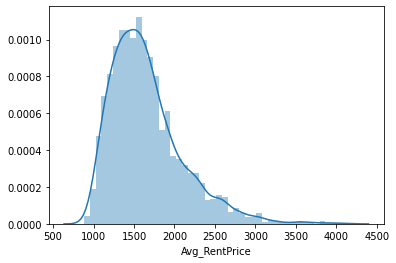

In [43]:
#look at histogram of ACS rent prices (of subset that match zillow data with same zipcode)
sns.distplot(check_diff2.Avg_RentPrice)

<AxesSubplot:xlabel='RentPrice'>

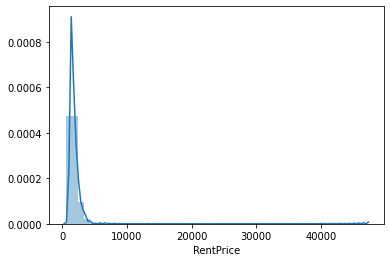

In [44]:
#look at histogram of zillow rent prices
sns.distplot(check_diff2.RentPrice)

(500.0, 4500.0)

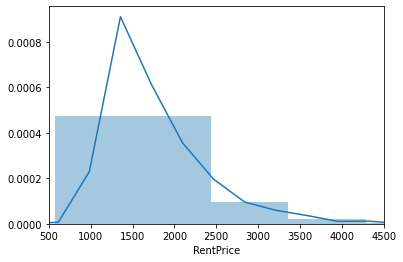

In [45]:
#limit x axis to same as ACS data
sns.distplot(check_diff2.RentPrice)
plt.xlim(500, 4500)

In [46]:
print(len(check_diff), len(check_diff2))
#check which rows are missing when 2 data frames are merged
#print(zillow_2018 != check_diff)
check_diff2

3238 3238


,RegionName,Avg_RentPrice,RentPrice,difference
0,28216,1314.52,1276.17,38.35
1,28277,1720.04,1609.92,110.12
2,28278,1686.99,1511.25,175.74
3,28173,1681.01,1998.75,-317.74
4,28205,1214.38,1299.00,-84.62
...,...,...,...,...
3233,98272,1595.28,1700.00,-104.72
3234,98033,2205.35,2385.83,-180.48
3235,98040,2595.24,2444.83,150.41
3236,98116,1840.94,1960.17,-119.23


In [47]:
#create function for getting the shift for each ACS dataset 
def median_shift(ACS, zillow):
    '''create function for shifting ACS dataset to match zillow median'''
    #filter zillow data for zipcode and rent price, change zipcode dtype to match ACS data
    zillow2 = zillow[['RegionName', 'RentPrice']]
    zillow2['RegionName'] = zillow2['RegionName'].astype('object')
    #merge datasets and check how they are different
    diff = pd.merge(ACS, zillow2, how='inner', on='RegionName')
    diff['difference'] = diff['Avg_RentPrice'] - diff['RentPrice']
    fifty_quantile = diff.difference.quantile(q=.5)
    print('shifting ACS data by:', fifty_quantile)
    #shift acs data based on difference in medians of both datasets
    shift = ACS
    shift['Avg_RentPrice'] = shift['Avg_RentPrice'] - fifty_quantile
    return shift;

In [64]:
df_ACSrents2017.describe()

,Avg_RentPrice,Year
count,30691.000000,33120.0
mean,1122.009512,2017.0
std,396.029752,0.0
min,264.990000,2017.0
25%,867.770000,2017.0
50%,1016.030000,2017.0
75%,1270.595000,2017.0
max,5616.460000,2017.0


In [49]:
shift_ACSrents2017 = median_shift(df_ACSrents2017, df_rents_2017)

shifting ACS data by: -214.98999999999995


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
shift_ACSrents2017.describe()

,Avg_RentPrice,Year
count,30691.000000,33120.0
mean,1122.009512,2017.0
std,396.029752,0.0
min,264.990000,2017.0
25%,867.770000,2017.0
50%,1016.030000,2017.0
75%,1270.595000,2017.0
max,5616.460000,2017.0


In [51]:
df_rents_2017.describe()

,RegionID,SizeRank,RentPrice,Year
count,3243.000000,3243.000000,3243.000000,3243.0
mean,85616.164662,2668.007092,1758.097817,2017.0
std,42414.118571,1908.083875,1989.319175,0.0
min,58362.000000,1.000000,567.250000,2017.0
25%,70451.500000,1103.500000,1245.875000,2017.0
50%,79124.000000,2360.000000,1510.500000,2017.0
75%,95042.500000,3906.500000,1947.665000,2017.0
max,753844.000000,10262.000000,54353.330000,2017.0


### Create one large ACS dataframe with rental data 

In [52]:
#create column 'Year' for each ACS dataframe
df_ACSrents2011['Year'] = 2011
df_ACSrents2012['Year'] = 2012
df_ACSrents2013['Year'] = 2013
df_ACSrents2014['Year'] = 2014
df_ACSrents2015['Year'] = 2015
df_ACSrents2016['Year'] = 2016
df_ACSrents2017['Year'] = 2017
df_ACSrents2018['Year'] = 2018

In [53]:
#create one dataframe with all ACS data
df_ACSrents2011_2012 = pd.concat([df_ACSrents2011, df_ACSrents2012])
df_ACSrents2011_2013 = pd.concat([df_ACSrents2011_2012, df_ACSrents2013])
df_ACSrents2011_2014 = pd.concat([df_ACSrents2011_2013, df_ACSrents2014])
df_ACSrents2011_2015 = pd.concat([df_ACSrents2011_2014, df_ACSrents2015])
df_ACSrents2011_2016 = pd.concat([df_ACSrents2011_2015, df_ACSrents2016])
df_ACSrents2011_2017 = pd.concat([df_ACSrents2011_2016, df_ACSrents2017])
df_ACSrents2011_2018 = pd.concat([df_ACSrents2011_2017, df_ACSrents2018], ignore_index=True)
df_ACSrents2011_2018

,RegionName,Avg_RentPrice,Year
0,02333,1211.80,2011
1,02338,1154.34,2011
2,02339,1327.89,2011
3,02341,1110.08,2011
4,02343,1367.27,2011
...,...,...,...
264955,98279,1059.87,2018
264956,98280,993.85,2018
264957,98311,1533.50,2018
264958,98326,778.99,2018


In [54]:
df_ACSrents2011_2018.describe()

,Avg_RentPrice,Year
count,245053.000000,264960.000000
mean,965.247365,2014.500000
std,497.995637,2.291292
min,50.000000,2011.000000
25%,657.500000,2012.750000
50%,845.900000,2014.500000
75%,1117.620000,2016.250000
max,5620.320000,2018.000000


### Create one large zillow dataframe with rental data 

In [55]:
#create one dataframe with all zillow data
df_rents_2014_2015 = pd.concat([df_rents_2014, df_rents_2015])
df_rents_2014_2016 = pd.concat([df_rents_2014_2015, df_rents_2016])
df_rents_2014_2017 = pd.concat([df_rents_2014_2016, df_rents_2017])
df_rents_2014_2018 = pd.concat([df_rents_2014_2017, df_rents_2018])
df_rents_2014_2019 = pd.concat([df_rents_2014_2018, df_rents_2019])
df_rents_2014_2020 = pd.concat([df_rents_2014_2019, df_rents_2020], ignore_index=True)
df_rents_2014_2020

,RegionID,RegionName,SizeRank,MsaName,RentPrice,Year
0,61639,10025,1,"New York, NY",3041.83,2014
1,84654,60657,2,"Chicago, IL",1589.42,2014
2,61637,10023,3,"New York, NY",3186.67,2014
3,91982,77494,4,"Houston, TX",1807.33,2014
4,84616,60614,5,"Chicago, IL",1786.25,2014
...,...,...,...,...,...,...
22696,58624,02110,9469,"Boston, MA",4408.57,2020
22697,66128,20004,9592,"Washington, DC",2505.56,2020
22698,399647,80951,9634,"Colorado Springs, CO",1647.88,2020
22699,62311,11964,10014,"New York, NY",15800.50,2020


In [56]:
df_rents_2014_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    22701 non-null  int64  
 1   RegionName  22701 non-null  object 
 2   SizeRank    22701 non-null  int64  
 3   MsaName     22701 non-null  object 
 4   RentPrice   22698 non-null  float64
 5   Year        22701 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


In [57]:
df_rents_2014_2020 = df_rents_2014_2020.drop(['RegionID', 'SizeRank', 'MsaName'], axis=1)

In [58]:
df_rents_2014_2020

,RegionName,RentPrice,Year
0,10025,3041.83,2014
1,60657,1589.42,2014
2,10023,3186.67,2014
3,77494,1807.33,2014
4,60614,1786.25,2014
...,...,...,...
22696,02110,4408.57,2020
22697,20004,2505.56,2020
22698,80951,1647.88,2020
22699,11964,15800.50,2020


In [59]:
describe=df_rents_2014_2020.describe()
describe

,RentPrice,Year
count,22698.000000,22701.000000
mean,1742.748701,2017.000000
std,1829.355115,2.000044
min,537.600000,2014.000000
25%,1235.647500,2015.000000
50%,1516.125000,2017.000000
75%,1939.957500,2019.000000
max,57488.000000,2020.000000


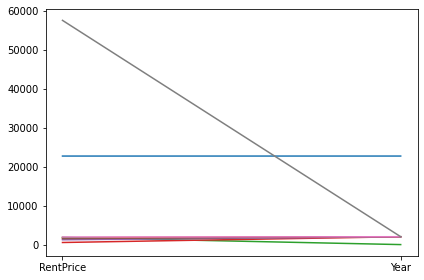

In [60]:
#need to fix this
#plot 25, 50, 75 percentiles from 2011-2020
plt.plot(describe.T)
plt.tight_layout()
plt.show()

In [61]:
df_rents_2014_2020.nunique()

RegionName     3243
RentPrice     17009
Year              7
dtype: int64

### Save Data

In [62]:
df_rents_2014_2020.to_csv(r'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/interim/df_rentPrices_2014_2020.csv', index=False)

### Notes


In [63]:
#3 NaNs in 2014, fill with linear of other years for those zipcodes?

### Summary